In [1]:
# configure plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable #for subplot colorbars
from matplotlib.pyplot import cm

%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'figure.figsize': (6, 6 / 1.6), 'font.size': 8, \
                            'figure.facecolor': (1, 1, 1, 0),'font.sans-serif':'Latin Modern Math'}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

%matplotlib inline

#dark plotting
plt.style.use('dark_background')

In [2]:
import numpy as np

In [3]:
def make_time(sample_frequency,sample_time):
    
    sample_number = int(sample_frequency * sample_time) #number of samples is the produce ot sample frequency and total measurement time
    
    taxis = np.linspace(0,1,sample_frequency) #make a vector from 0 to 1s in increments of sample number in units of s
    dt = taxis[1]-taxis[0] # sample spacing
    # dt is also simply 1/sample rate
    taxis = np.arange(0,sample_time,dt)
    
    return taxis

In [4]:
FFT_1600_taxis =  make_time(int(2.5e3),1.6)

# Reading vibrometer outputs

In [5]:
import os
import glob
import natsort
import numpy as np

In [6]:
def mirror_complex_fft(complex_fft):
    
    fft_vector = (complex_fft) #/ len(faxis)  #making a fft vector of complex -- should some scaling go in here to correct for polytec yscale?
    fft_vector_copy = fft_vector.copy() #making a copy of the fft vector
    fft_mirrored = fft_vector_copy[::-1] #flipping such that vectors starta with most negative frequencies
    fft_joined = np.append(fft_vector,fft_mirrored) #appending both vectors

    return fft_joined

In [7]:
def load_vibrometer_scan(path,extension):
    "this function takes a vibrometer output text file and creates a"
    "complex-valued array of the fft. also mirrors these data for proper formatting to ifft functions"
    
    #loading files names
    os.chdir(path)
    file_names = []
    
    for name in glob.glob(extension):
        file_names.append(name)
        
    file_names = natsort.natsorted(file_names, reverse=False)

###############################################################################
    time = [[] for _ in range(len(file_names))]
    velocity = [[] for _ in range(len(file_names))]

    for scan_point in range(len(file_names)):

        #loading a .txt file, only the numerical data and not the header info
        temp = np.loadtxt(file_names[scan_point],skiprows = 7) 
        
        #swapping axes so that data are ordered by columns
        temp = np.swapaxes(temp,0,1) 

        #reading the velocity
        velocity[scan_point] = temp[1]

        #reading the time vector
        time[scan_point] = temp[0]
###############################################################################    
    #i suppose i could retrieve the complex, un-mirrored fft -- but for now the ifft is important so i will take only the mirrored
    return np.asarray(time),np.asarray(velocity)

# Loading data

In [9]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/2024_04_05/Tapping/'
extension = 'tapping_*.txt'

time,velocity = load_vibrometer_scan(path,extension)

In [ ]:
cmap = 'RdYlBu_r'

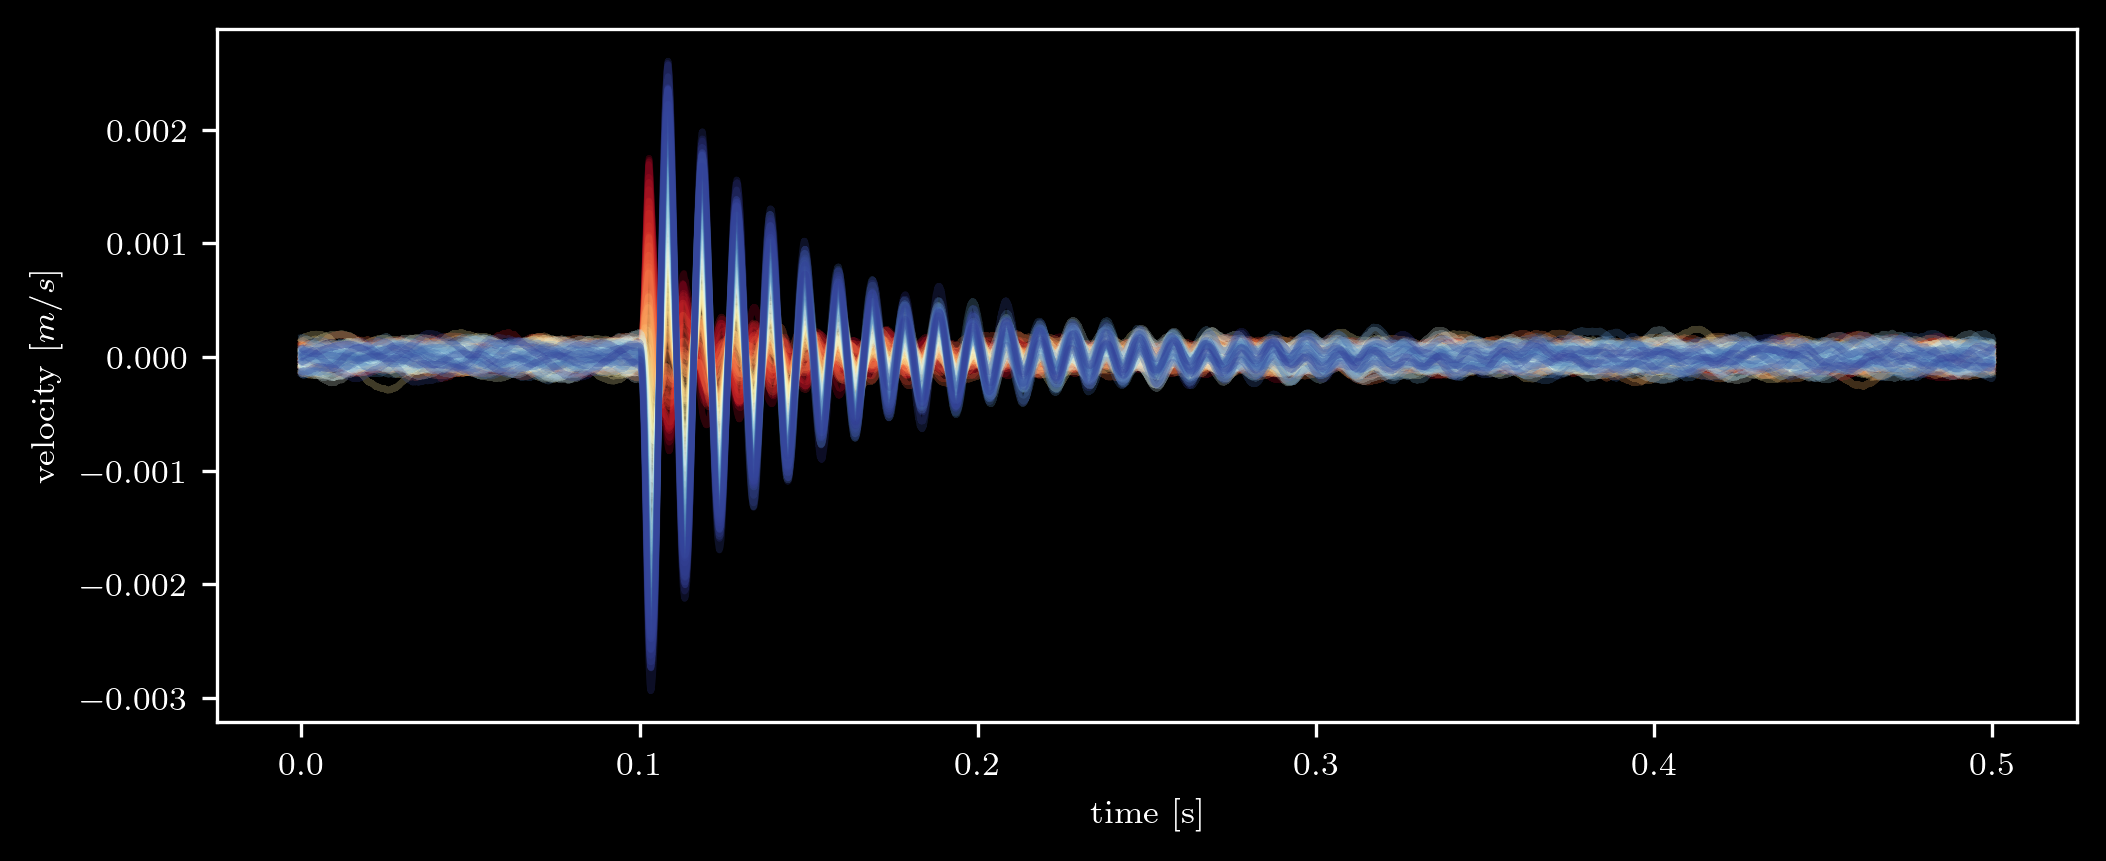

In [68]:
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(111)

# offset = np.logspace(np.log10(.001), np.log10(0.002), 100)
# offset = offset/100000

color=iter(cm.RdYlBu(np.linspace(0,1,len(time))))

for i in range(len(time)):
    c=next(color)
    ax1.plot(time[i],velocity[i],alpha = 0.25,color = c)

ax1.set_xlabel(r'time [s]')
ax1.set_ylabel(r'velocity $[m/s]$')
# ax1.set_ylim([-2.5e-3,2.5e-3]);

# plt.savefig("/Volumes/Extreme Pro/Projects/Vibrometer/Figures/tapping_timeseries" + ".jpg",format="JPG",bbox_inches='tight')

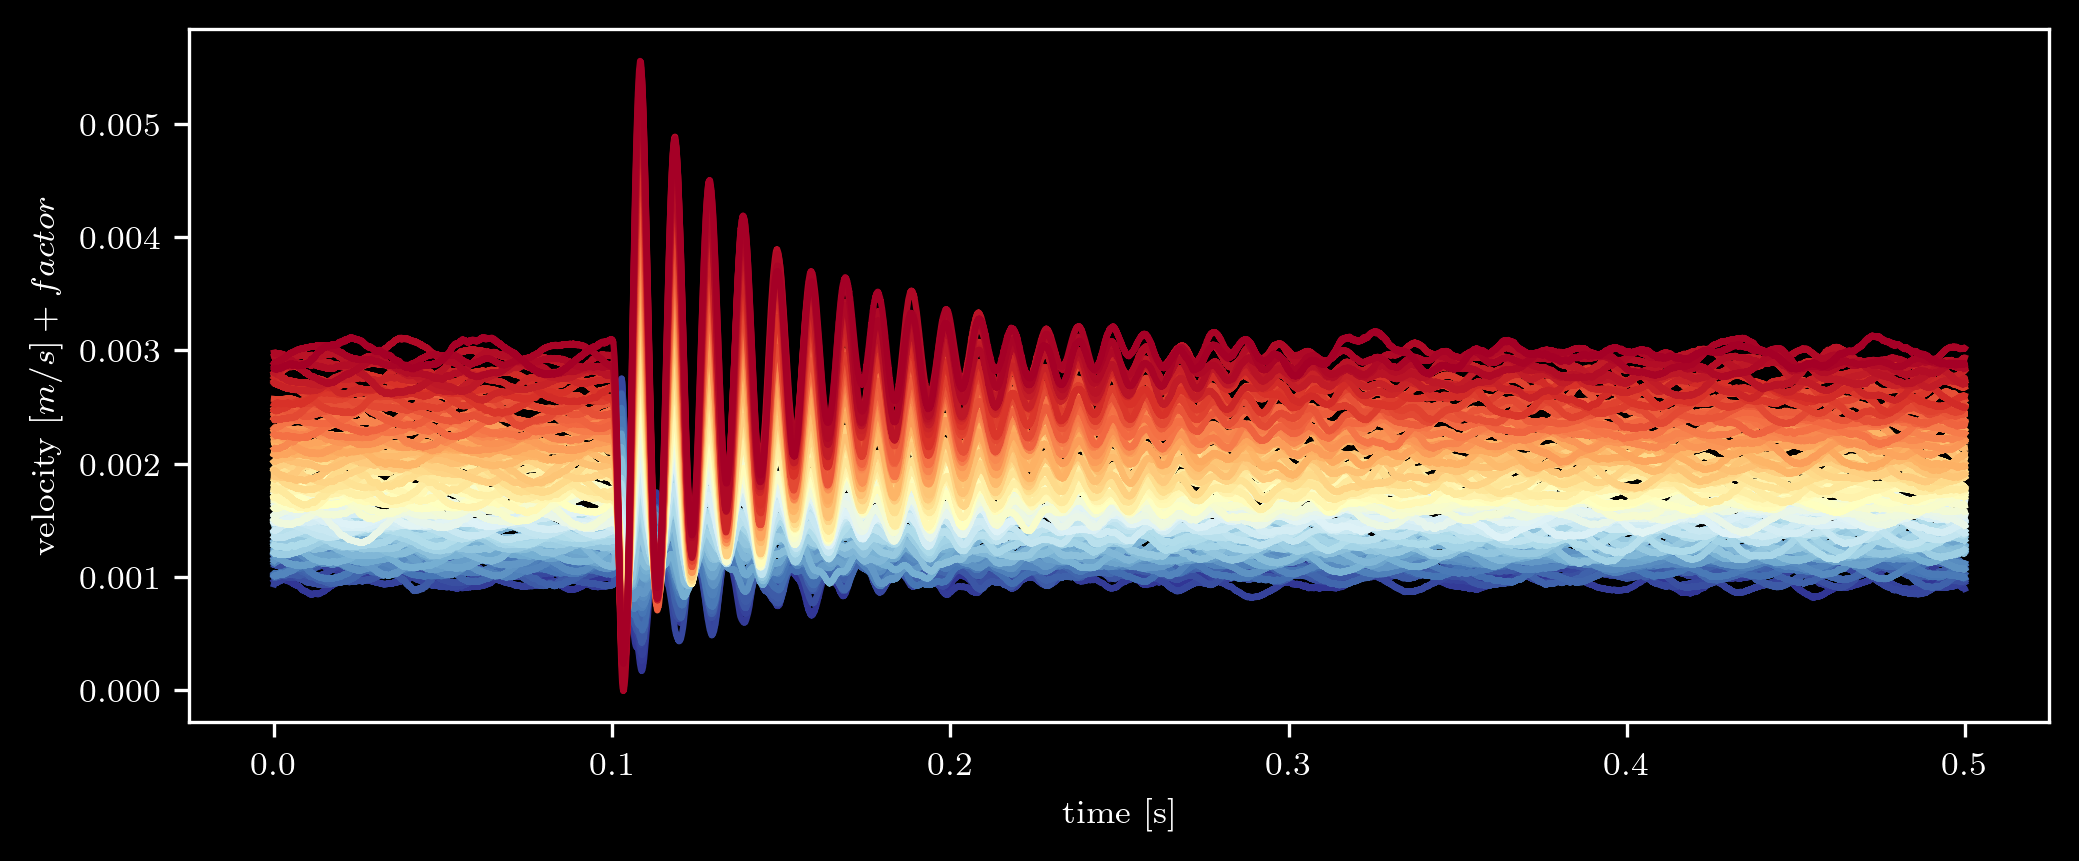

In [67]:
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(111)

offset = np.logspace(np.log10(.001), np.log10(0.003), 100)

color=iter(cm.RdYlBu_r(np.linspace(0,1,len(time))))

for i in range(len(time)):
    c=next(color)
    ax1.plot(time[i],velocity[i]+offset[i],color = c)

ax1.set_xlabel(r'time [s]')
ax1.set_ylabel(r'velocity $[m/s] + factor$')
# ax1.set_ylim([-2.5e-3,2.5e-3]);


# plt.savefig("/Volumes/Extreme Pro/Projects/Vibrometer/Figures/tapping_timeseries_joydivision" + ".jpg",format="JPG",bbox_inches='tight')